*italicised<div align="center">
  <h1><strong>Technical Assignment #2</strong></h1>
  <table style="margin-bottom: 30px;">
    <tr>
      <th>Nama</th>
      <th>Kelompok</th>
      <th>Universitas</th>
    </tr>
    <tr>
      <td>Rega Arzula Akbar</td>
      <td>27</td>
      <td>Universitas Telkom</td>
    </tr>
  </table>
  
  ---------------
  
  <h1><strong>Dataset AI4I 2020 Predictive Maintenance</strong></h1>
</div>
 text*

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [96]:
df = pd.read_csv("/content/ai4i2020.csv")

In [45]:
df.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [47]:
df.shape

(10000, 14)

In [48]:
print(df.describe())

               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000   

Preprocessing

In [84]:
duplicate_rows_df = df[df.duplicated()]
print ("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 14)


In [85]:
df.count()

UDI                        10000
Product ID                 10000
Type                       10000
Air temperature [K]        10000
Process temperature [K]    10000
Rotational speed [rpm]     10000
Torque [Nm]                10000
Tool wear [min]            10000
Machine failure            10000
TWF                        10000
HDF                        10000
PWF                        10000
OSF                        10000
RNF                        10000
dtype: int64

In [86]:
df = df.drop_duplicates()
df.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [64]:
df.count()

Type                       10000
Air temperature [K]        10000
Process temperature [K]    10000
Rotational speed [rpm]     10000
Torque [Nm]                10000
Tool wear [min]            10000
Machine failure            10000
TWF                        10000
HDF                        10000
PWF                        10000
OSF                        10000
RNF                        10000
dtype: int64

In [87]:
print(df.isnull().sum())

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


In [88]:
count_per_class = df['Machine failure'].value_counts()

print(count_per_class)

Machine failure
0    9661
1     339
Name: count, dtype: int64


Heatmap

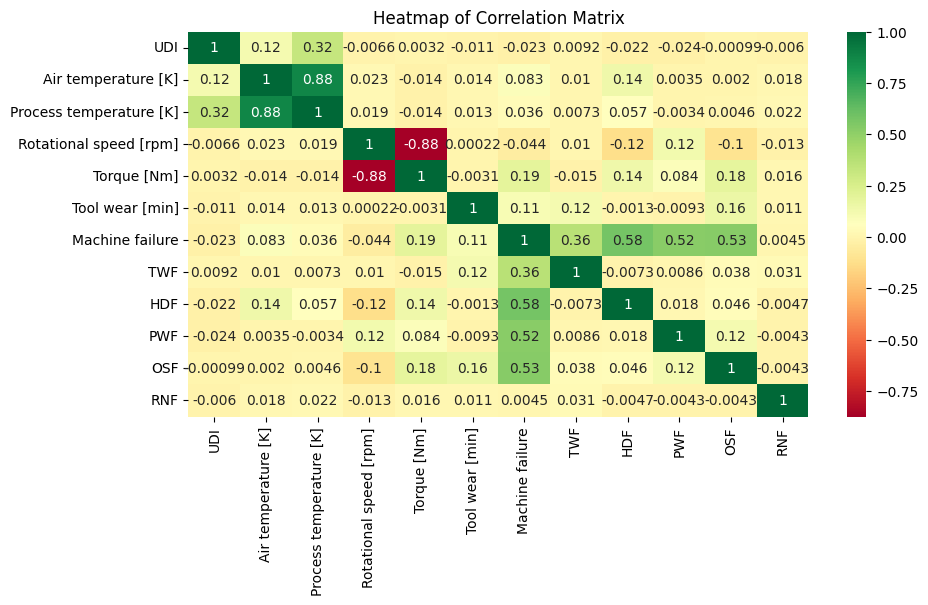

In [89]:
df_numerik = df.select_dtypes(include=['float64', 'int64'])
c = df_numerik.corr()

plt.figure(figsize=(10,5))
sns.heatmap(c, cmap="RdYlGn", annot=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [97]:
df['Temp_Diff'] = df['Process temperature [K]'] - df['Air temperature [K]']
df['Wear_Rate'] = df['Torque [Nm]'] / (df['Rotational speed [rpm]'] + 1)

df = df.drop(columns=['UDI', 'Product ID'])

x = df.drop(columns=['TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
y = df['TWF']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

categorical_cols = ['Type']
numerical_cols = x.columns.difference(categorical_cols)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

x_transformed = pipeline.fit_transform(x)


encoded_cat_cols = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_cols)
feature_names = numerical_cols.tolist() + encoded_cat_cols.tolist()


x_train, x_test, y_train, y_test = train_test_split(x_transformed, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

RandomForest

In [99]:
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(x_train, y_train)


y_pred = rf_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1991
           1       1.00      0.78      0.88         9

    accuracy                           1.00      2000
   macro avg       1.00      0.89      0.94      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
[[1991    0]
 [   2    7]]


In [103]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best CV Accuracy: {grid_search.best_score_:.2f}')


best_rf_model = grid_search.best_estimator_

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best CV Accuracy: 1.00
